In [34]:
from google.colab import files
file = files.upload()

Saving National level daily - 1.csv to National level daily - 1 (1).csv


In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import fbprophet
from fbprophet.diagnostics import performance_metrics
from fbprophet.diagnostics import cross_validation

In [36]:
data = pd.read_csv('National level daily - 1.csv',parse_dates=['Date'])
data.head(5)

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased,Unnamed: 7
0,2020-01-30,1,1,0,0,0,0,NaN
1,2020-01-31,0,1,0,0,0,0,NaN
2,2020-02-01,0,1,0,0,0,0,NaN
3,2020-02-02,1,2,0,0,0,0,NaN
4,2020-02-03,1,3,0,0,0,0,NaN


In [37]:
data.shape

(258, 8)

In [38]:
data.describe()

,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased,Unnamed: 7
count,258.000000,2.580000e+02,258.000000,2.580000e+02,258.000000,258.000000,0.0
mean,28051.488372,1.436062e+06,24414.135659,1.104373e+06,426.492248,25835.224806,NaN
std,32697.978917,2.099916e+06,31183.803706,1.734059e+06,432.470023,33352.632180,NaN
min,0.000000,1.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,NaN
25%,504.500000,3.249750e+03,40.000000,2.440000e+02,14.500000,86.250000,NaN
50%,9914.000000,2.520440e+05,5312.000000,1.212525e+05,273.000000,7075.500000,NaN
75%,59296.000000,2.253913e+06,52870.750000,1.569792e+06,854.000000,45142.250000,NaN
max,97860.000000,7.237284e+06,102070.000000,6.298847e+06,2004.000000,110035.000000,NaN


In [39]:
data.isnull().sum()

Date                 0
Daily Confirmed      0
Total Confirmed      0
Daily Recovered      0
Total Recovered      0
Daily Deceased       0
Total Deceased       0
Unnamed: 7         258
dtype: int64

In [40]:
data_new = pd.DataFrame()
data_new['ds'] = data['Date']
data_new['y'] = data['Daily Confirmed']
data_new.columns = ['ds','y']

In [41]:
data_new.head(5)

,ds,y
0,2020-01-30,1
1,2020-01-31,0
2,2020-02-01,0
3,2020-02-02,1
4,2020-02-03,1


In [42]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      258 non-null    datetime64[ns]
 1   y       258 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 4.2 KB


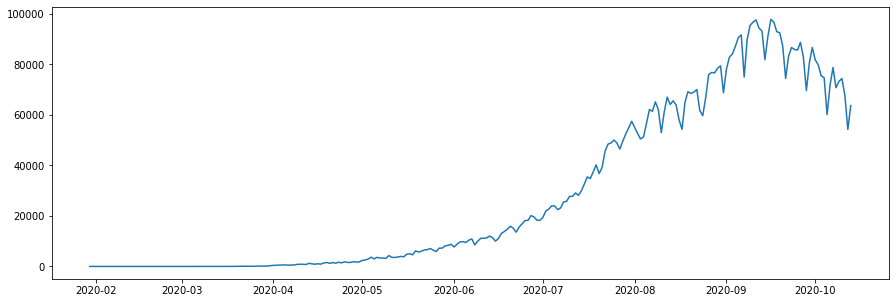

In [43]:

plt.figure(figsize=(15,5))
plt.plot(data_new['ds'], data_new['y'])
plt.show()

In [44]:

m = fbprophet.Prophet()
m.fit(data_new)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [45]:
forecast = m.make_future_dataframe(periods= 300, freq = 'D')
forecast = m.predict(forecast)

In [46]:
x = forecast[['ds','yhat','yhat_lower','yhat_upper']]
x.head(5)

,ds,yhat,yhat_lower,yhat_upper
0,2020-01-30,-477.469370,-8058.610254,6987.627690
1,2020-01-31,-532.982216,-8283.226607,6722.685254
2,2020-02-01,-448.946011,-8150.293812,6952.300252
3,2020-02-02,-1633.241247,-9259.828046,5949.009911
4,2020-02-03,-5346.040732,-12434.204267,2048.656744


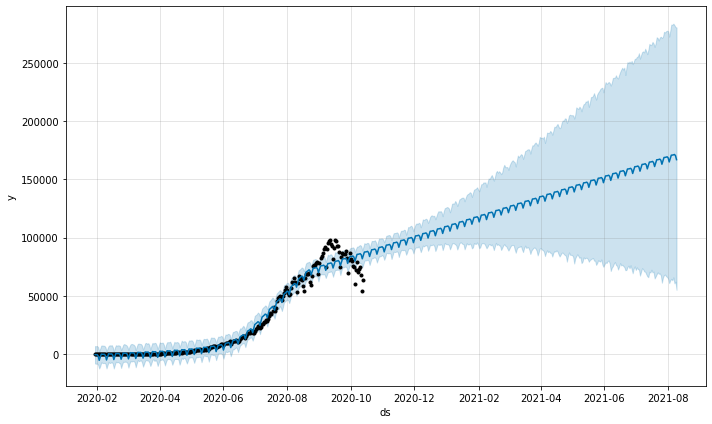

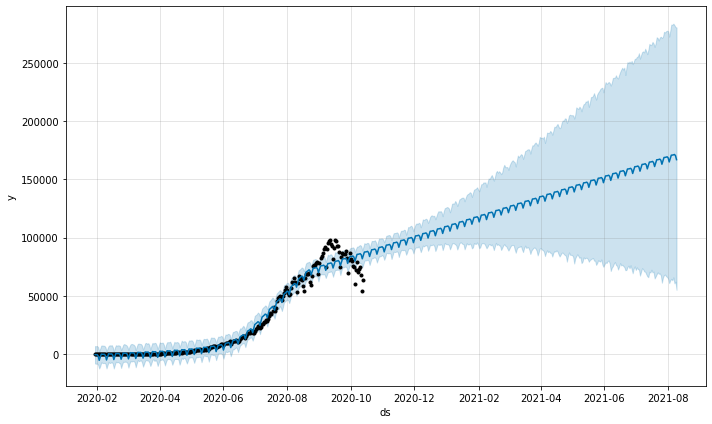

In [47]:
m.plot(forecast)

In [48]:
df_cv = cross_validation(m, initial='40 days', period='10 days', horizon = '10 days')
df_cv.head()

INFO:fbprophet:Making 21 forecasts with cutoffs between 2020-03-17 00:00:00 and 2020-10-03 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-03-18,11.451840,6.279788,16.532634,25,2020-03-17
1,2020-03-19,9.230484,3.892489,14.240470,27,2020-03-17
2,2020-03-20,8.944792,3.952612,14.011799,58,2020-03-17
3,2020-03-21,9.373393,4.555177,14.514331,78,2020-03-17
4,2020-03-22,9.659137,4.325982,14.620113,69,2020-03-17


In [49]:
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,1 days,4.247921e+07,6517.607793,3723.417960,0.180758,0.114567,0.047619
1,2 days,7.642924e+07,8742.381845,4341.091045,0.190435,0.094042,0.142857
2,3 days,5.538332e+07,7441.996884,4268.264286,0.223458,0.148871,0.190476
3,4 days,4.822344e+07,6944.309609,4034.180885,0.214126,0.123083,0.238095
4,5 days,9.035674e+07,9505.616225,4825.176903,0.240070,0.149252,0.095238
